<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Karl\AppData\Local\Temp\ipykernel_25020\3913729126.py:13: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\Student_performance_data.csv', delimiter=",")


Accuracy: 0.7306889352818372

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.10      0.17        21
         1.0       0.58      0.52      0.55        54
         2.0       0.53      0.62      0.57        78
         3.0       0.63      0.45      0.52        83
         4.0       0.84      0.97      0.90       243

    accuracy                           0.73       479
   macro avg       0.72      0.53      0.54       479
weighted avg       0.73      0.73      0.71       479



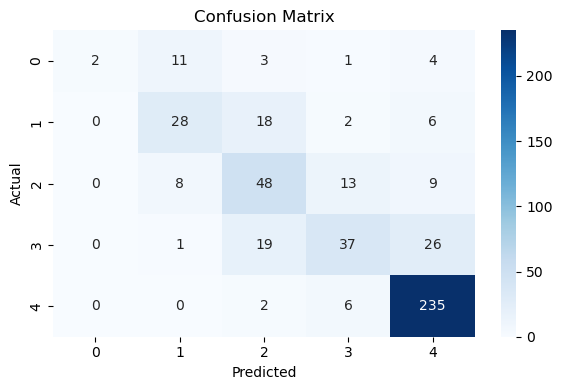

First 20 Predictions:


,Actual,Predicted,Match
0,2.000000,2.000000,True
1,0.000000,1.000000,False
2,4.000000,4.000000,True
3,4.000000,4.000000,True
4,3.000000,2.000000,False
5,4.000000,4.000000,True
6,4.000000,4.000000,True
7,2.000000,2.000000,True
8,3.000000,4.000000,False
9,1.000000,2.000000,False


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

#Step 1: Import CSVs
df = pd.read_csv('..\data\Student_performance_data.csv', delimiter=",")

#Step 2: Separate features and target
X = df.drop(columns=["StudentID", "GradeClass", "GPA"])
y = df['GradeClass']

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=df['GradeClass'])

#Step 4: Feature sclaing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Step 5: Train Logistic Regression model
ln = LogisticRegression(solver='lbfgs', max_iter=100)
ln.fit(X_train_scaled, y_train)

#Setp 6: predictions
predictions = ln.predict(X_test_scaled)
predictions  #Returns GradeClass based on the columns provided

#Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

#Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#Step 8: Save the model as pkl file in artifacts

with open("../artifacts/regression_model.pkl", "wb") as file:
    pickle.dump(ln, file)
with open("../artifacts/regression_scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

#Step 9: Save predictions to CSV
comparison_df = X_test.copy()
comparison_df["Actual_GradeClass"] = y_test.values
comparison_df["Predicted_GradeClass"] = predictions

#Step 10: Show and save the prediction table

try:
    from IPython.display import display

    # Prepare DataFrame for display
    comparison_df = pd.DataFrame({"Actual": y_test.values,"Predicted": predictions})
    comparison_df["Match"] = comparison_df["Actual"] == comparison_df["Predicted"]

    def highlight_false_text(row):
        styles = []
        for col in row.index:
            if col == "Match" and row["Match"] == False:
                styles.append("color: red; background-color: black")
            else:
                styles.append("background-color: black; color: white")
        return styles

    print("First 20 Predictions:")
    display(comparison_df.head(20).style.apply(highlight_false_text, axis=1))

except Exception as e:
    print("\n First 20 Predictions:")
    print(comparison_df.head(20).to_string(index=False))


comparison_df.to_csv("../artifacts/regression_prediction.csv", index=False)


# Logistic Regression Model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   object 
 2   Ethnicity          2392 non-null   object 
 3   ParentalEducation  2392 non-null   object 
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   object 
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   object 
dtypes: float64(2), int64(7), object(5)
memory usage: 261.8+ KB
               Age  StudyTimeWeekly     Absences     Tutoring

c:\Users\ferre\OneDrive\Documents\Belgium\MLG382\MLG382_PGroup\MLG382_Guided_Project_GroupX\src\preprocess_data.py:59: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({False: 0.0, True: 1.0})


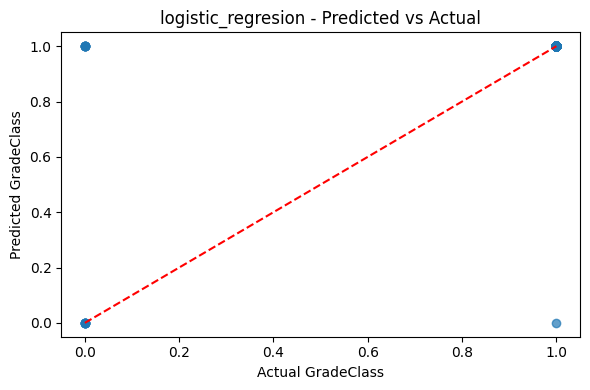

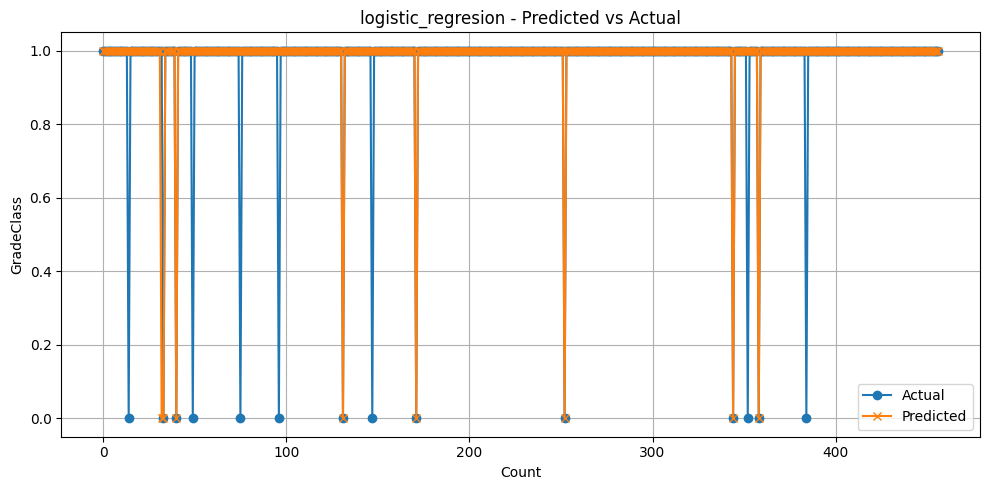

In [1]:
#Importing Required Libraries
import sys
import os

# Import the python libraies from source
#Allows for model to reload without reloading Kernel
import importlib 

#Python files can be used 
sys.path.append(os.path.abspath("../src"))

#prepare_data.py file importing functions
from prepare_data import (
    load_data,
    catagorical_column_transformations,
    feature_engineering
    
)
#preprocess_data.py file importing functions
from preprocess_data import (
    scale_and_encode,
    remove_anomalies,
    get_numeric_columns,
    iterative_outlier_removal,
    make_Onehot
)
#train_models.py file importing functions
from train_models import (
    split_features_target,
    create_train_test_split,
    get_model,
    train_model
)


# Data preparation
# load the data using the load_data function from prepare_data.py
df = load_data('..\data\Student_performance_data.csv')
print(df.describe(df.info()))

# decode the catagorical features
df = catagorical_column_transformations(df)
# perform feature engineering using the feature_engineering function from prepare_data.py
df = feature_engineering(df)
# Preprocessing
# scale and encode the data using the scale_and_encode function from preprocess_data.py
df = scale_and_encode(df)

#print(df.columns.to_list())
# remove anomalies using the remove_anomalies function from preprocess_data.py
#   df = remove_anomalies(df) ~ Removing the anaomalies might break the model

# get the numeric columns using the get_numeric_columns function from preprocess_data.py
numeric_columns = get_numeric_columns(df)
# iterative outlier removal using the iterative_outlier_removal function from preprocess_data.py
df = iterative_outlier_removal(df, numeric_columns)
# make the data one-hot
df = make_Onehot(df)
# Model preparation
X, y = split_features_target(df)

# Ensure the target variable `y` contains discrete classes
# Convert continuous values in `y` into binary classes (e.g., 0 and 1) based on a threshold
threshold = -2  # You can adjust this threshold as needed
y = (y > threshold).astype(int)
# create an train test plit
X_train, X_test, Y_train, Y_test = create_train_test_split(X, y)
# reloading and training the deeplearning model
model=get_model('logistic_regresion')
# model training and evaliation
train_model(model, 'logistic_regresion', X_train, X_test, Y_train, Y_test)